#  <span style="font-family: Latin Modern Roman; font-size: 35px; font-weight: bold;"> Final Project. Credit Card Customer Segmentation</span>

<p align="center" style="display: block; max-width: 100%;">
  <img src="https://media.istockphoto.com/id/1367581709/vector/credit-card-icon.jpg?s=612x612&w=0&k=20&c=wTyQsDnKyN2YRbUMaqjcJEfLXShNoTx9fUqnPOZCqes=" style="max-width: 22%; height: auto;">
</p>


---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 1. Exploratory Data Analysis </span>


In [1]:
import pandas as pd

df = pd.read_csv('./BankChurners.csv', header = 0)
df = df[df.columns[:-2]]
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [2]:
df_info = pd.DataFrame(df.dtypes, columns = ['Dtype'])
df_info = df_info.iloc[:, :-2]
df_info['Unique'] = df.nunique().values
df_info['Null'] = df.isnull().sum().values
df_info

,Unique,Null
CLIENTNUM,10127,0
Attrition_Flag,2,0
Customer_Age,45,0
Gender,2,0
Dependent_count,6,0
Education_Level,7,0
Marital_Status,4,0
Income_Category,6,0
Card_Category,4,0
Months_on_book,44,0


In [3]:
df.duplicated().sum()

0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

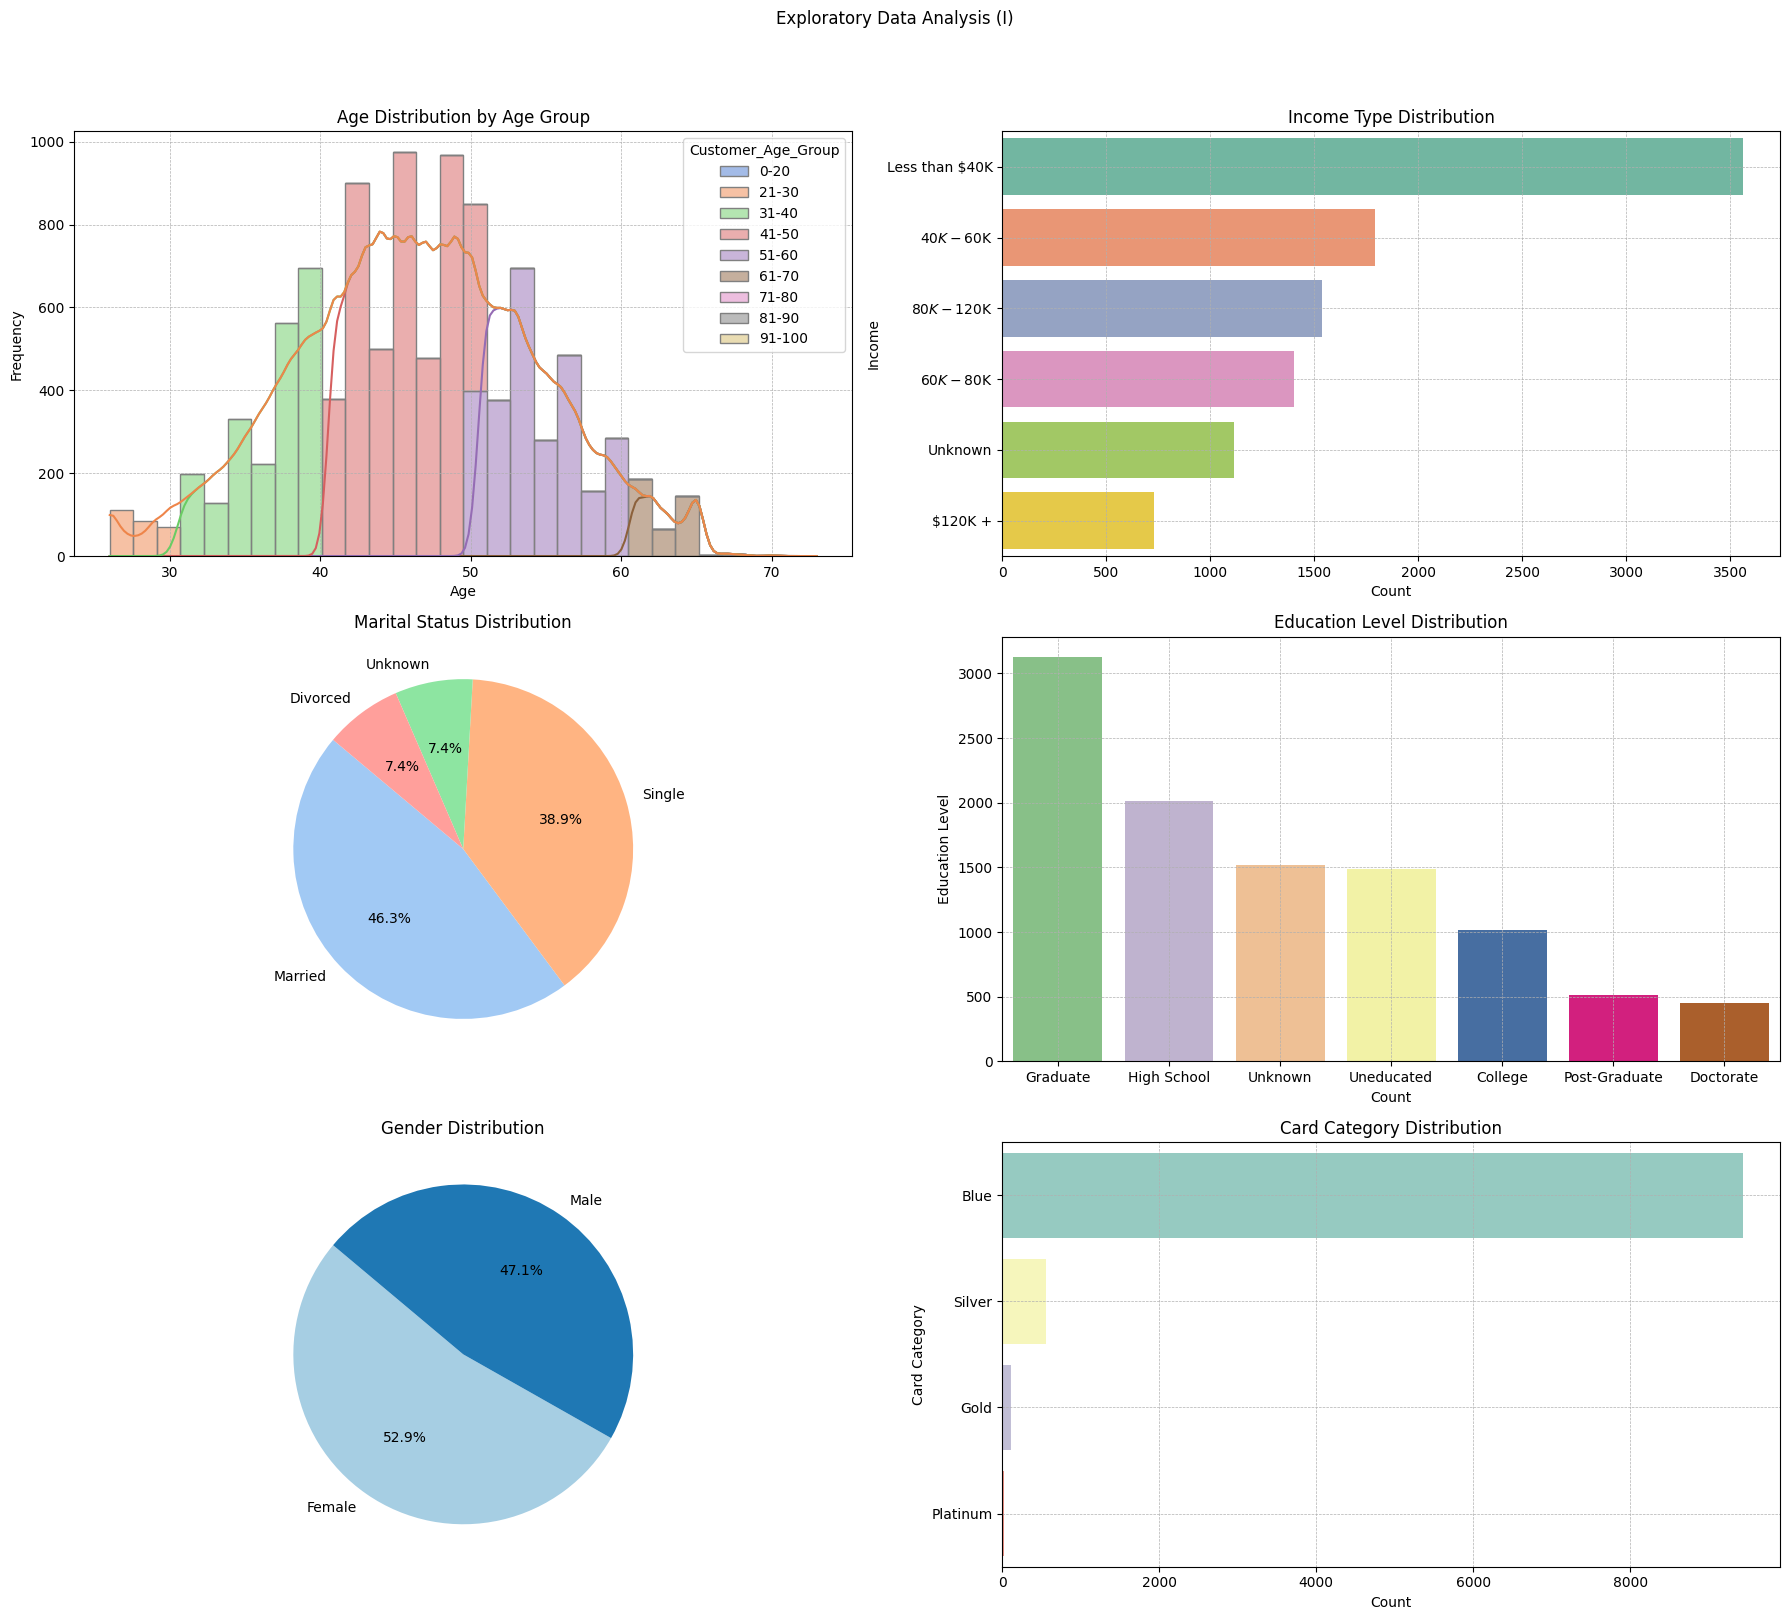

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

# Subplot area
fig, axes = plt.subplots(3, 2, figsize = (18, 17))
fig.suptitle('Exploratory Data Analysis (I)')

# Age Distribution by Age Group
age_bins = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df['Customer_Age_Group'] = pd.cut(df['Customer_Age'], bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels = age_bins)
sns.histplot(data=df, x = 'Customer_Age', hue = 'Customer_Age_Group', multiple = 'stack', palette = 'muted', edgecolor = 'gray', ax = axes[0, 0], bins = 30, kde = True)
axes[0, 0].set_title('Age Distribution by Age Group')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, which = "both", ls = "--", linewidth = 0.5)

# Income Type Distribution
job_types = df['Income_Category'].value_counts().index
colors = sns.color_palette("Set2", len(job_types))
for i, income in enumerate(job_types):
    sns.barplot(x=[df[df['Income_Category'] == income]['Income_Category'].count()], y = [income], ax = axes[0, 1], color = colors[i])
axes[0, 1].set_title('Income Type Distribution')
axes[0, 1].set_xlabel('Count')
axes[0, 1].set_ylabel('Income')
axes[0, 1].grid(True, which = "both", ls = "--", linewidth = 0.5)

# Marital Status Distribution
marital_counts = df['Marital_Status'].value_counts()
axes[1, 0].pie(marital_counts, labels = marital_counts.index, autopct = '%1.1f%%', startangle = 140, colors = sns.color_palette("pastel", len(marital_counts)))
axes[1, 0].set_title('Marital Status Distribution')

# Education Level Distribution
sns.countplot(x = 'Education_Level', data = df, order = df['Education_Level'].value_counts().index, ax = axes[1, 1], palette = 'Accent')
axes[1, 1].set_title('Education Level Distribution')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('Education Level')
axes[1, 1].tick_params(axis = 'x', labelsize = 'medium')
axes[1, 1].grid(True, which = "both", ls = "--", linewidth = 0.5)

# Gender Status Distribution
gender_counts = df['Gender'].value_counts()
axes[2, 0].pie(gender_counts, labels = gender_counts.index.map({'F': 'Female', 'M': 'Male'}), autopct = '%1.1f%%', startangle = 140, colors = sns.color_palette("Paired", len(gender_counts)))
axes[2, 0].set_title('Gender Distribution')

# Card Category Distribution
card_category = df['Card_Category'].value_counts().index
colors = sns.color_palette("Set3", len(job_types))
for i, card in enumerate(card_category):
    sns.barplot(x=[df[df['Card_Category'] == card]['Card_Category'].count()], y = [card], ax = axes[2, 1], color = colors[i])
axes[2, 1].set_title('Card Category Distribution')
axes[2, 1].set_xlabel('Count')
axes[2, 1].set_ylabel('Card Category')
axes[2, 1].grid(True, which = "both", ls = "--", linewidth = 0.5)

plt.tight_layout(rect = [0, 0.03, 1, 0.95])
plt.show()

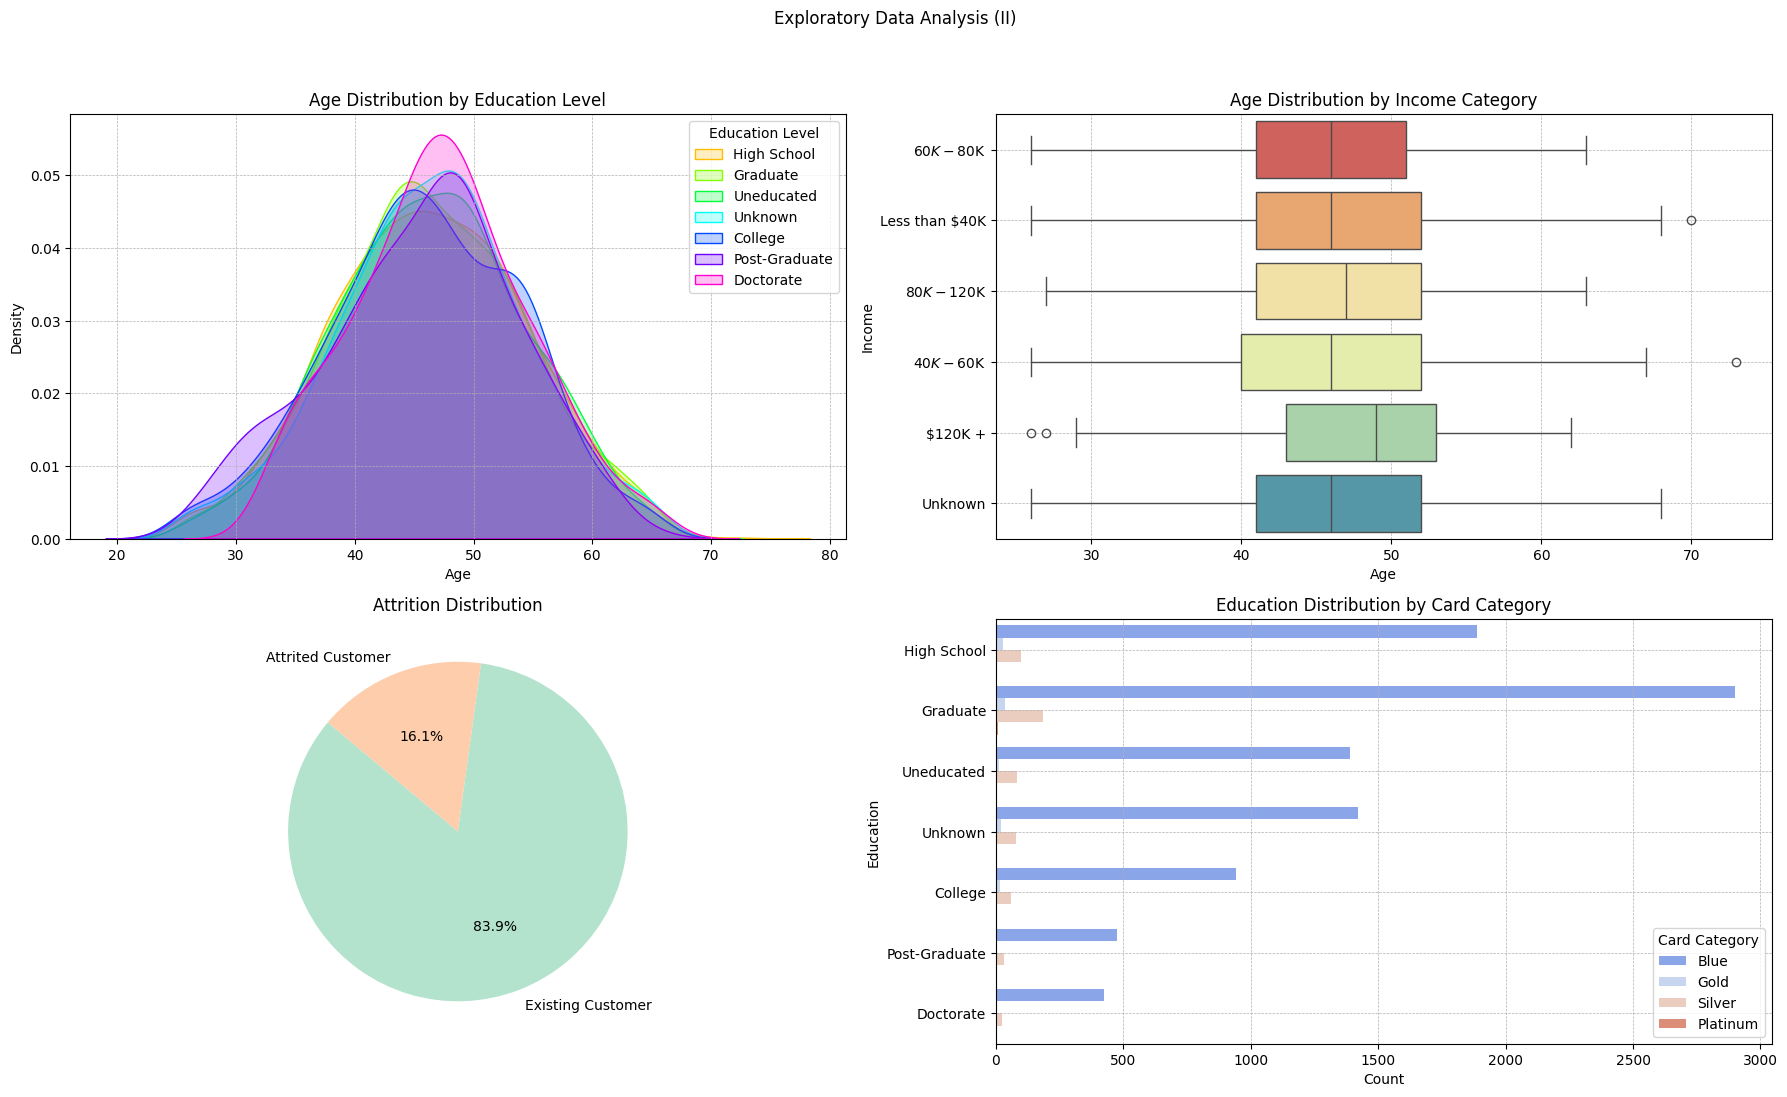

In [6]:
warnings.filterwarnings("ignore")

# Setting up the subplot area
fig, axes = plt.subplots(2, 2, figsize = (18, 11.5))  # Adjust the size as needed
fig.suptitle('Exploratory Data Analysis (II)')

# Age Distribution by Education Level
education_levels = df['Education_Level'].unique()
palette = sns.color_palette("hsv", len(education_levels))
for i, level in enumerate(education_levels):
    sns.kdeplot(df[df['Education_Level'] == level]['Customer_Age'], ax = axes[0, 0], shade = True, label = level, color = palette[i])
axes[0, 0].set_title('Age Distribution by Education Level')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Density')
axes[0, 0].legend(title = 'Education Level')
axes[0, 0].grid(True, which = "both", ls = "--", linewidth = 0.5)

# Age and Income Distribution
sns.boxplot(x = 'Customer_Age', y = 'Income_Category', data = df, ax = axes[0, 1], palette = 'Spectral')
axes[0, 1].set_title('Age Distribution by Income Category')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Income')
axes[0, 1].grid(True)
axes[0, 1].grid(True, which = "both", ls = "--", linewidth = 0.5)

# Attrition Flag Distribution
attrition_counts = df['Attrition_Flag'].value_counts()
axes[1, 0].pie(attrition_counts, labels = attrition_counts.index, autopct = '%1.1f%%', startangle = 140, colors = sns.color_palette("Pastel2", len(attrition_counts)))
axes[1, 0].set_title('Attrition Distribution')

# Education and Card Category Loan Distribution
sns.countplot(y = 'Education_Level', hue = 'Card_Category', data = df, ax = axes[1, 1], palette = 'coolwarm')
axes[1, 1].set_title('Education Distribution by Card Category')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('Education')
axes[1, 1].legend(title = 'Card Category')
axes[1, 1].grid(True, which = "both", ls = "--", linewidth = 0.5)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust for the main title and subplots
plt.show()

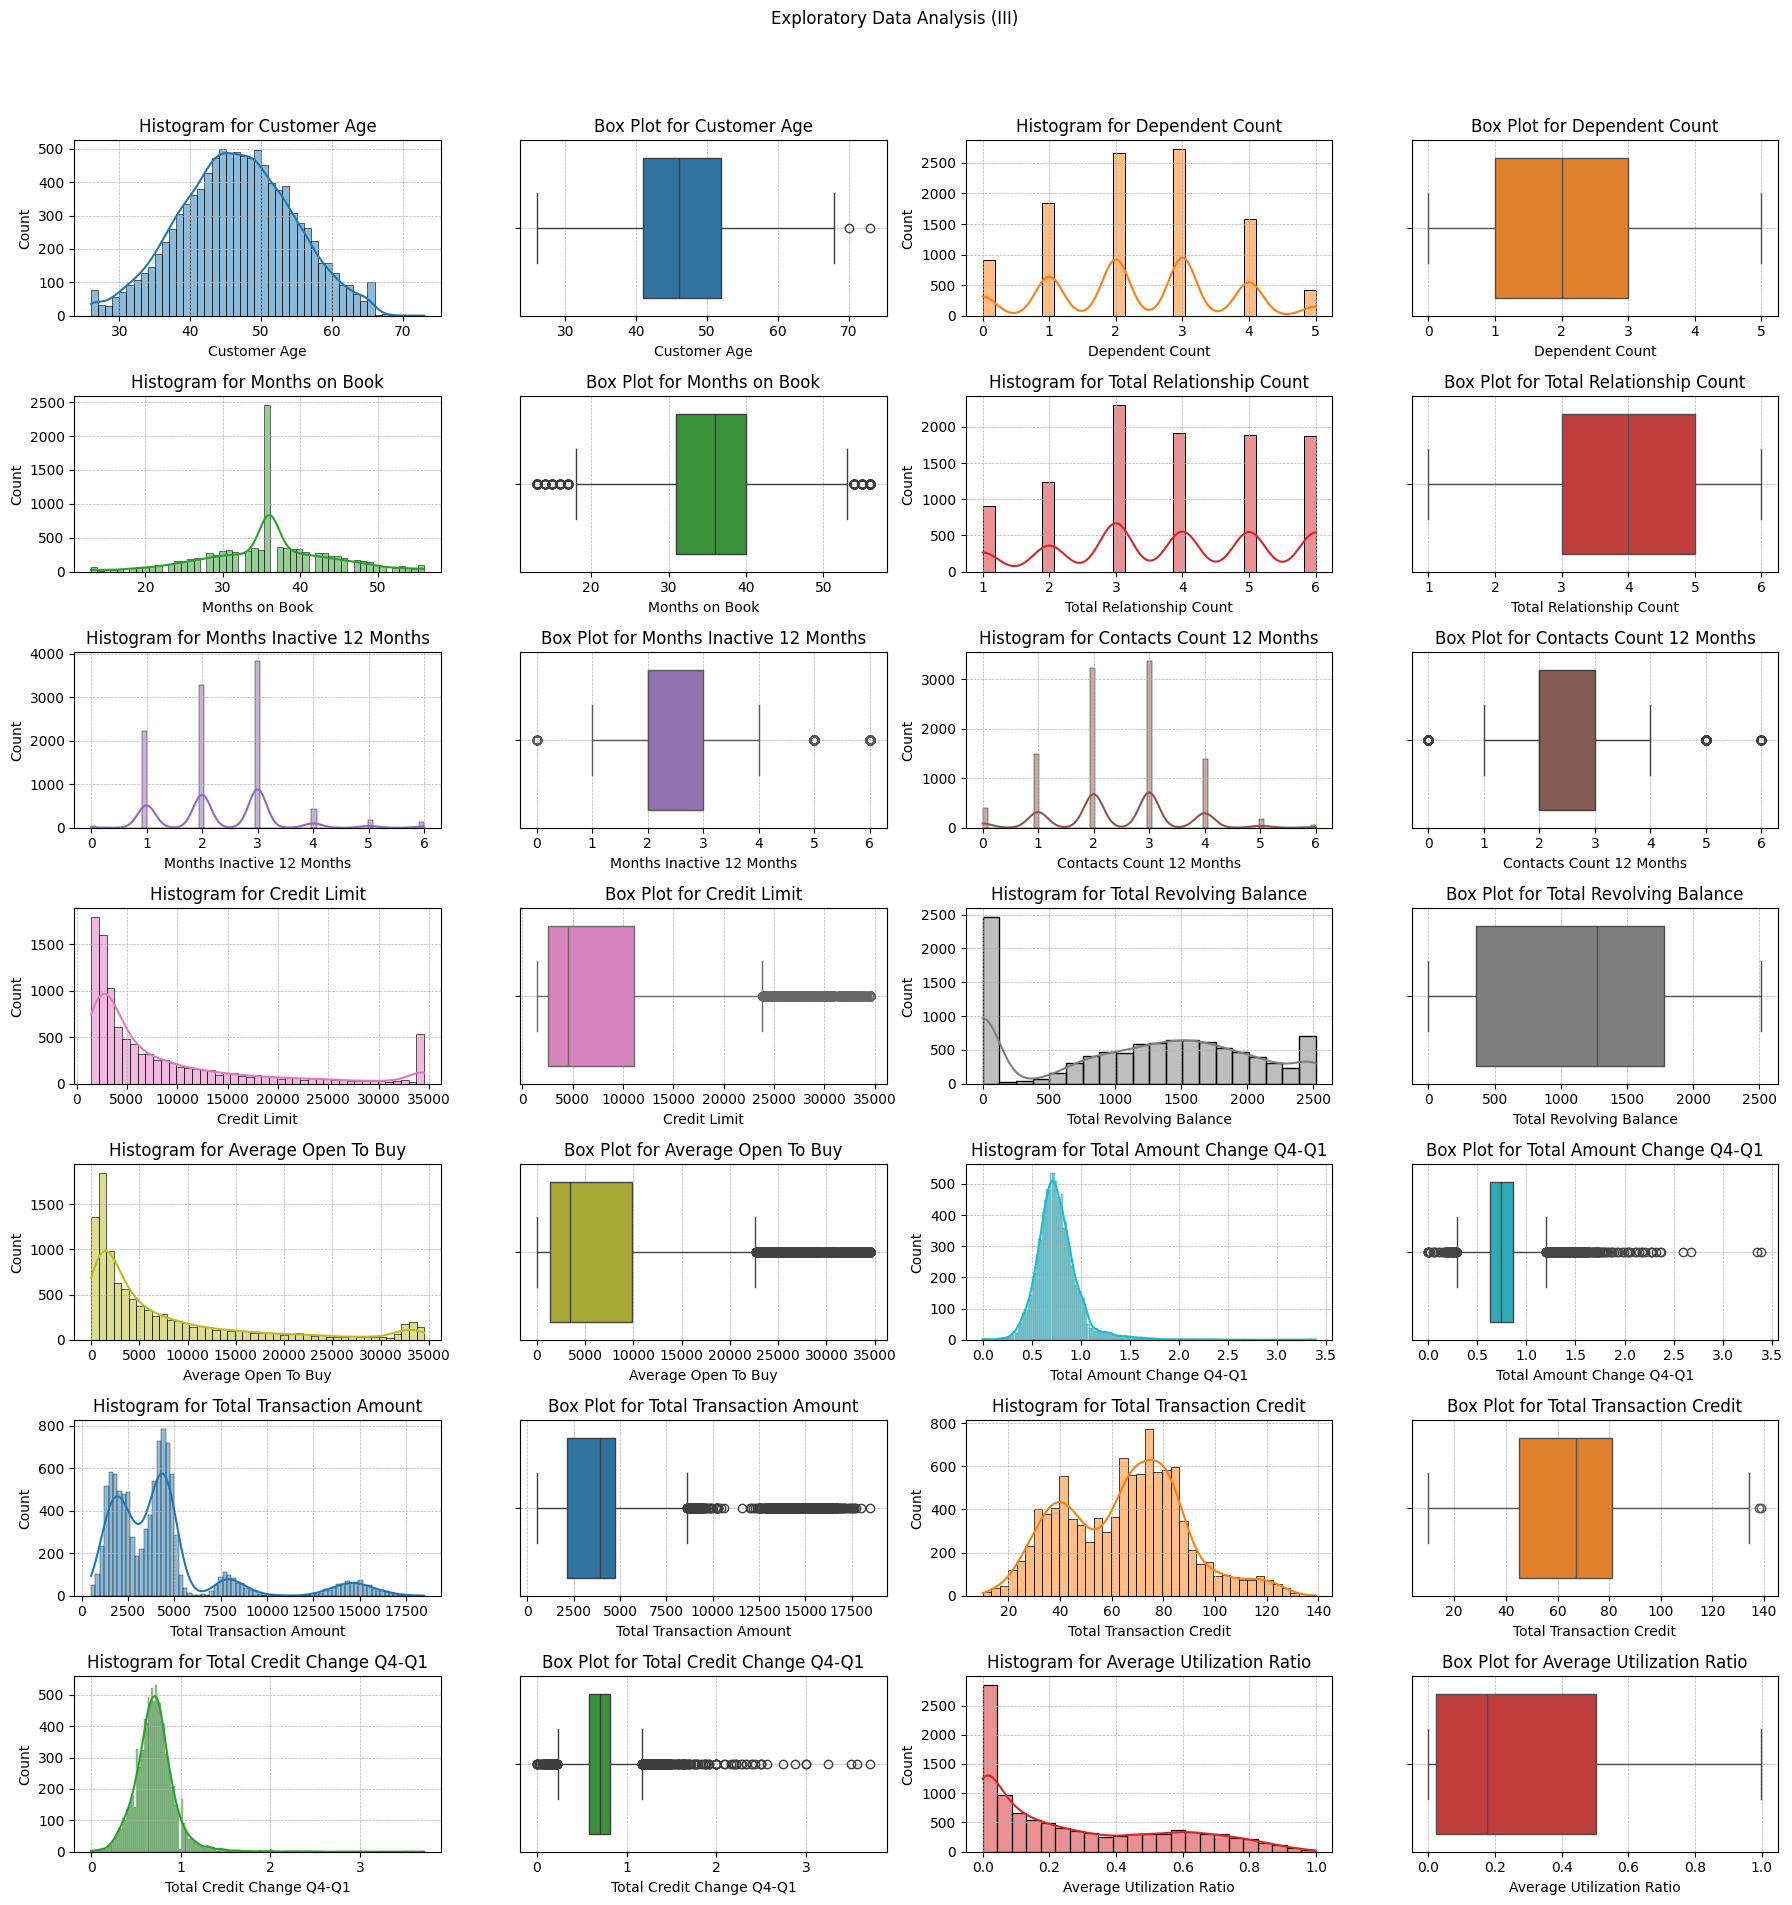

In [7]:
# List of columns to plot
columns_to_plot = {
    "Customer_Age": "Customer Age", 
    "Dependent_count": "Dependent Count", 
    "Months_on_book": "Months on Book", 
    "Total_Relationship_Count": "Total Relationship Count",
    "Months_Inactive_12_mon": "Months Inactive 12 Months", 
    "Contacts_Count_12_mon": "Contacts Count 12 Months", 
    "Credit_Limit": "Credit Limit",
    "Total_Revolving_Bal": "Total Revolving Balance", 
    "Avg_Open_To_Buy": "Average Open To Buy", 
    "Total_Amt_Chng_Q4_Q1": "Total Amount Change Q4-Q1",
    "Total_Trans_Amt": "Total Transaction Amount", 
    "Total_Trans_Ct": "Total Transaction Credit", 
    "Total_Ct_Chng_Q4_Q1": "Total Credit Change Q4-Q1",
    "Avg_Utilization_Ratio": "Average Utilization Ratio"
}

# Set the color palette
palette = sns.color_palette("tab10")

rows_needed = 7

fig, axes = plt.subplots(nrows=rows_needed, ncols=4, figsize=(18, 20))
fig.suptitle('Exploratory Data Analysis (III)')

# Loop through the list and create a histogram and boxplot for each numerical column
for i, (column_key, column_name) in enumerate(columns_to_plot.items()):
    # Histogram
    sns.histplot(df[column_key], ax=axes[i // 2, (i % 2) * 2], kde=True, color=palette[i % len(palette)])
    axes[i // 2, (i % 2) * 2].set_title(f'Histogram for {column_name}')
    axes[i // 2, (i % 2) * 2].set_xlabel(column_name)
    axes[i // 2, (i % 2) * 2].grid(True, which="both", ls="--", linewidth=0.5)
    
    # Box plot
    sns.boxplot(x=df[column_key], ax=axes[i // 2, (i % 2) * 2 + 1], color=palette[i % len(palette)])
    axes[i // 2, (i % 2) * 2 + 1].set_title(f'Box Plot for {column_name}')
    axes[i // 2, (i % 2) * 2 + 1].set_xlabel(column_name)
    axes[i // 2, (i % 2) * 2 + 1].grid(True, which="both", ls="--", linewidth=0.5)


# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## <span style="font-family: Latin Modern Roman; font-size: 20px; font-style: italic;"> Insights Gained from Initial Exploration </span>
<div style="text-align: justify;">

- El número del cliente es irrelevante para el análisis, por lo que se elimina dicha columna.
</div>

In [8]:
df = df.drop(columns=['CLIENTNUM'])
df = df.drop(columns=['Customer_Age_Group'])

- El salario de los clientes en uno de los factores críticos para los servicios provistos por la compañía de tarjetas de crédito. Se excluyen aquellos clientes cuyos ingresos son desconocidos, lo que servirá para segmentar a los clientes de manera más efectiva.

In [9]:
df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [10]:
df = df.drop(df[df['Income_Category'] == 'Unknown'].index)

- Se agrupan los clientes divorciados con los clientes solteros dado que el aspecto importante para el análisis es saber si el cliente tiene pareja o no.

In [11]:
df['Marital_Status'].value_counts()

Married     4194
Single      3499
Unknown      667
Divorced     655
Name: Marital_Status, dtype: int64

In [12]:
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced'], 'Single')

- Como el porcentaje de los clientes que tienen una tarjeta Oro o Platino es tan pequeño, se agrupan estas categorías con las tarjetas Plata, creando una nueva categoría, principalmente para distinguir estos clientes de aquellos que poseen la tarjeta más básica.

In [13]:
df['Card_Category'].value_counts()

Blue        8391
Silver       502
Gold         107
Platinum      15
Name: Card_Category, dtype: int64

In [14]:
df['Card_Category'] = df['Card_Category'].replace(['Silver', 'Gold', 'Platinum'], 'Silver+')

- Se remueven las columnas que presentan outliers significativos que están muy alejados de los distribución de los datos

In [15]:
def remove_outliers(df, columns):

    # Create a copy of the dataframe
    clean_df = df.copy()
    
    for column in columns:
        Q1 = clean_df[column].quantile(0.25)
        Q3 = clean_df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        clean_df = clean_df[(clean_df[column] >= lower_bound) & (clean_df[column] <= upper_bound)]
        
    return clean_df

columns_to_check = ["Total_Amt_Chng_Q4_Q1", "Total_Trans_Amt", "Total_Ct_Chng_Q4_Q1"]

df_no_outliers = remove_outliers(df, columns_to_check)


In [16]:
df = df_no_outliers

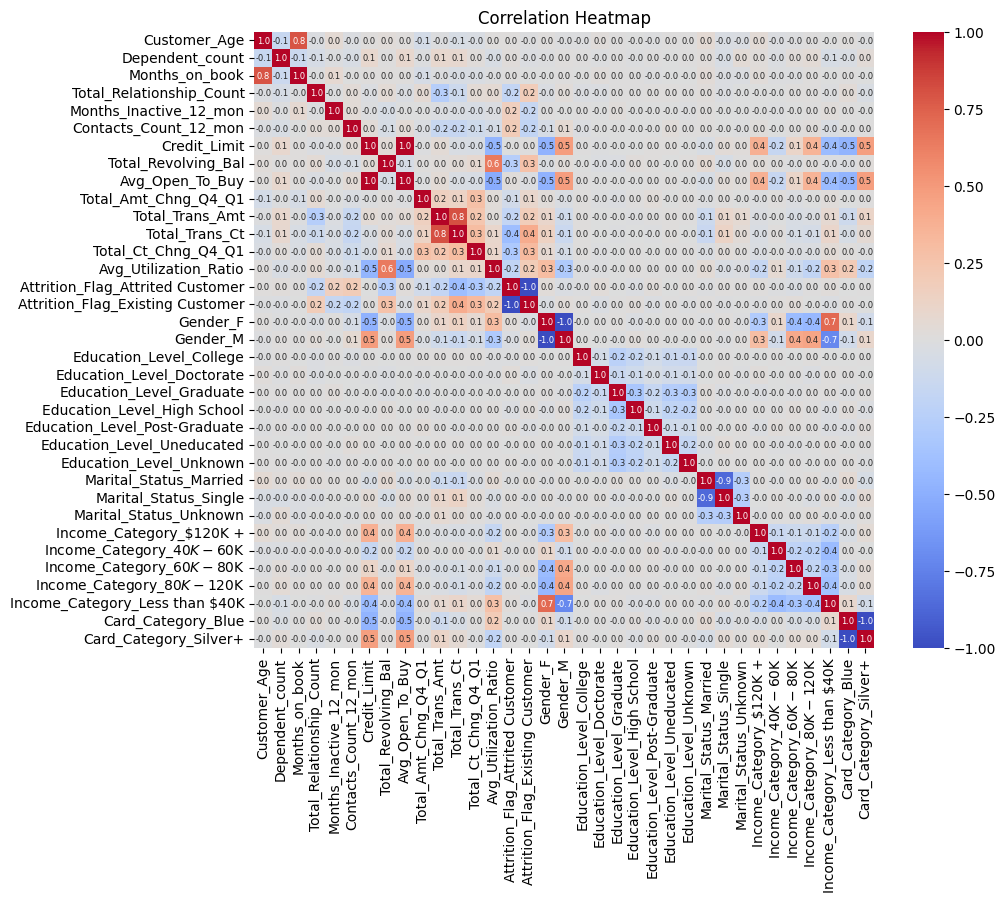

In [17]:
df_dummies = pd.get_dummies(df)

# Plot Correlation Heatmap
plt.figure(figsize = (10, 8))
sns.heatmap(df_dummies.corr(), annot=True, cmap = "coolwarm", fmt = ".1f", annot_kws = {"size": 6})
plt.title("Correlation Heatmap", fontsize=12)
plt.show()

- Se elimina la columna `Avg_Open_To_Buy` puesto que tiene correlación perfecta con `Credit_Limit` y sería redundante mantener ambas variables

In [18]:
df = df.drop(columns=['Avg_Open_To_Buy'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7636 entries, 10 to 10125
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            7636 non-null   object 
 1   Customer_Age              7636 non-null   int64  
 2   Gender                    7636 non-null   object 
 3   Dependent_count           7636 non-null   int64  
 4   Education_Level           7636 non-null   object 
 5   Marital_Status            7636 non-null   object 
 6   Income_Category           7636 non-null   object 
 7   Card_Category             7636 non-null   object 
 8   Months_on_book            7636 non-null   int64  
 9   Total_Relationship_Count  7636 non-null   int64  
 10  Months_Inactive_12_mon    7636 non-null   int64  
 11  Contacts_Count_12_mon     7636 non-null   int64  
 12  Credit_Limit              7636 non-null   float64
 13  Total_Revolving_Bal       7636 non-null   int64  
 14  Total_

---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 3. Data Preprocessing </span>

In [20]:
one_hot_cols = ["Gender", "Education_Level", "Marital_Status", "Income_Category", 
                "Card_Category", "Dependent_count", "Total_Relationship_Count", 
                "Months_Inactive_12_mon", "Contacts_Count_12_mon", "Attrition_Flag"]
standard_cols = ["Customer_Age", "Total_Amt_Chng_Q4_Q1", "Total_Ct_Chng_Q4_Q1", "Months_on_book"]
minmax_cols = ["Total_Trans_Amt", "Total_Trans_Ct", "Total_Revolving_Bal"]
power_cols = ["Total_Revolving_Bal", "Credit_Limit", "Avg_Utilization_Ratio"]

In [21]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer(
    [
        ("one-hot", OneHotEncoder(), one_hot_cols),
        ("standard", StandardScaler(), standard_cols),
        ("minmax", MinMaxScaler(), minmax_cols),
        ("power", PowerTransformer(), power_cols),
    ]
)

df_scaled = pd.DataFrame(preprocessing.fit_transform(df), columns = preprocessing.get_feature_names_out())

In [22]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7636 entries, 0 to 7635
Data columns (total 57 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   one-hot__Gender_F                          7636 non-null   float64
 1   one-hot__Gender_M                          7636 non-null   float64
 2   one-hot__Education_Level_College           7636 non-null   float64
 3   one-hot__Education_Level_Doctorate         7636 non-null   float64
 4   one-hot__Education_Level_Graduate          7636 non-null   float64
 5   one-hot__Education_Level_High School       7636 non-null   float64
 6   one-hot__Education_Level_Post-Graduate     7636 non-null   float64
 7   one-hot__Education_Level_Uneducated        7636 non-null   float64
 8   one-hot__Education_Level_Unknown           7636 non-null   float64
 9   one-hot__Marital_Status_Married            7636 non-null   float64
 10  one-hot__Marital_Status_

In [23]:
X = df_scaled.drop(['one-hot__Attrition_Flag_Attrited Customer', 'one-hot__Attrition_Flag_Existing Customer'], axis = 1)
y = df_scaled[['one-hot__Attrition_Flag_Attrited Customer', 'one-hot__Attrition_Flag_Existing Customer']]

In [24]:
from sklearn.model_selection import train_test_split

# Dividing the dataset in training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42, stratify = y)

---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 4. Association Rules </span>

In [45]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

nominal_categories = {
    'Attrition_Flag': 'Attrition',
    'Gender': 'Gender',
    'Education_Level': 'Education Level',
    'Marital_Status': 'Marital Status',
    'Income_Category': 'Income Level',
    'Card_Category': 'Card Category'
}

one_hot_feature_names = []
for key in nominal_categories.keys():
    one_hot_feature_names.extend([col for col in df_scaled.columns if col.startswith(f"one-hot__{key}")])

# Select only nominal categories form Apriori Algorithm
df_rules = df_scaled[one_hot_feature_names].astype(bool)

# Apply the Apriori Algorithm to find frequent itemsets. Sort them by support
frequent_itemsets = apriori(df_rules, min_support = 0.35, use_colnames = True, verbose = 1).sort_values(by = 'support', ascending = False)
frequent_itemsets

Processing 45 combinations | Sampling itemset size 3


,support,itemsets
6,0.944605,(one-hot__Card_Category_Blue)
0,0.830801,(one-hot__Attrition_Flag_Existing Customer)
11,0.785359,"(one-hot__Card_Category_Blue, one-hot__Attriti..."
2,0.502619,(one-hot__Gender_M)
1,0.497381,(one-hot__Gender_F)
13,0.480094,"(one-hot__Gender_F, one-hot__Card_Category_Blue)"
4,0.472499,(one-hot__Marital_Status_Single)
14,0.464510,"(one-hot__Gender_M, one-hot__Card_Category_Blue)"
3,0.452200,(one-hot__Marital_Status_Married)
16,0.441723,"(one-hot__Marital_Status_Single, one-hot__Card..."


In [64]:
# Generate and sort Association Rules
rules_confidence = association_rules(frequent_itemsets, metric = 'confidence', min_threshold = 0.9).sort_values(by = 'confidence', ascending = False)
rules_confidence


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
9,"(one-hot__Gender_F, one-hot__Income_Category_L...",(one-hot__Card_Category_Blue),0.379780,0.944605,0.367208,0.966897,1.023599,0.008466,1.673406,0.037173
5,(one-hot__Income_Category_Less than $40K),(one-hot__Card_Category_Blue),0.408853,0.944605,0.395102,0.966368,1.023039,0.008898,1.647093,0.038096
1,(one-hot__Gender_F),(one-hot__Card_Category_Blue),0.497381,0.944605,0.480094,0.965245,1.021851,0.010266,1.593879,0.042544
6,"(one-hot__Gender_F, one-hot__Attrition_Flag_Ex...",(one-hot__Card_Category_Blue),0.407412,0.944605,0.393007,0.964642,1.021212,0.008163,1.566685,0.035052
4,(one-hot__Marital_Status_Married),(one-hot__Card_Category_Blue),0.452200,0.944605,0.432687,0.956849,1.012963,0.005537,1.283763,0.023360
12,"(one-hot__Marital_Status_Married, one-hot__Att...",(one-hot__Card_Category_Blue),0.378339,0.944605,0.361708,0.956040,1.012106,0.004327,1.260138,0.019241
0,(one-hot__Attrition_Flag_Existing Customer),(one-hot__Card_Category_Blue),0.830801,0.944605,0.785359,0.945303,1.000739,0.000580,1.012764,0.004365
11,"(one-hot__Marital_Status_Single, one-hot__Attr...",(one-hot__Card_Category_Blue),0.390519,0.944605,0.366029,0.937290,0.992257,-0.002856,0.883366,-0.012642
3,(one-hot__Marital_Status_Single),(one-hot__Card_Category_Blue),0.472499,0.944605,0.441723,0.934867,0.989691,-0.004601,0.850498,-0.019364
10,"(one-hot__Income_Category_Less than $40K, one-...",(one-hot__Gender_F),0.395102,0.497381,0.367208,0.929400,1.868588,0.170692,7.119258,0.768455


In [62]:
rules_lift = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1.3).sort_values(by = 'lift', ascending = False)
rules_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,"(one-hot__Gender_F, one-hot__Card_Category_Blue)",(one-hot__Income_Category_Less than $40K),0.480094,0.408853,0.367208,0.764866,1.870762,0.170920,2.514090,0.895275
4,(one-hot__Income_Category_Less than $40K),"(one-hot__Gender_F, one-hot__Card_Category_Blue)",0.408853,0.480094,0.367208,0.898142,1.870762,0.170920,5.104232,0.787382
2,"(one-hot__Income_Category_Less than $40K, one-...",(one-hot__Gender_F),0.395102,0.497381,0.367208,0.929400,1.868588,0.170692,7.119258,0.768455
5,(one-hot__Gender_F),"(one-hot__Income_Category_Less than $40K, one-...",0.497381,0.395102,0.367208,0.738283,1.868588,0.170692,2.311270,0.924829
0,(one-hot__Income_Category_Less than $40K),(one-hot__Gender_F),0.408853,0.497381,0.379780,0.928892,1.867566,0.176424,7.068365,0.785834
1,(one-hot__Gender_F),(one-hot__Income_Category_Less than $40K),0.497381,0.408853,0.379780,0.763560,1.867566,0.176424,2.500197,0.924246


---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 5. Ensemble - Random Forest </span>

## <span style="font-family: Latin Modern Roman; font-size: 23px;"> 5.1. Hiperparameter Search. Predictor Importance. Confusion Matrices</span>

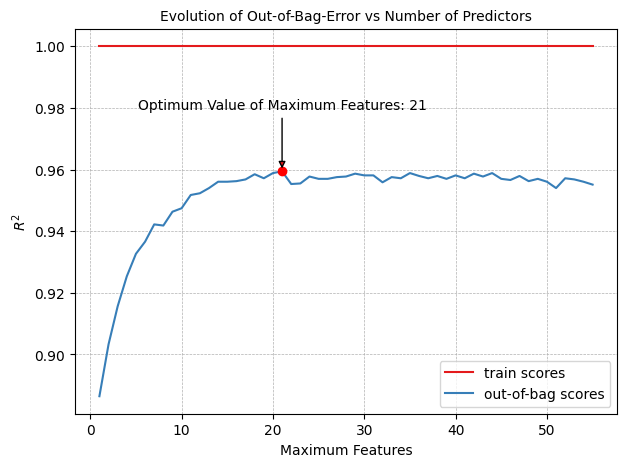

In [25]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Defining number of features to use based on Out-of-Bag error
train_scores = []
oob_scores   = []

# Values to test for number of features
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Loop for training a model for each value in max_features. It is obtained training error
# and Out-of-Bag.
for max_features in max_features_range:
    model = RandomForestClassifier(
                n_estimators = 100,
                criterion    = 'entropy',  # or 'gini'
                max_depth    = None,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 42
             )
    model.fit(X_train, y_train['one-hot__Attrition_Flag_Existing Customer'])
    train_scores.append(model.score(X_train, y_train['one-hot__Attrition_Flag_Existing Customer']))
    oob_scores.append(model.oob_score_)
    
# Graphic with the evolution of errors
sns.set_palette("Set1")

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, oob_scores, label="out-of-bag scores")
ax.plot(max_features_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red")
ax.annotate(f"Optimum Value of Maximum Features: {max_features_range[np.argmax(oob_scores)]}",
            xy=(max_features_range[np.argmax(oob_scores)], max(oob_scores)),
            xytext=(max_features_range[np.argmax(oob_scores)], max(oob_scores)+0.02),
            arrowprops={'arrowstyle': '-|>'}, ha='center')
ax.set_ylabel(r'$R^2$')
ax.set_xlabel("Maximum Features")
ax.set_title("Evolution of Out-of-Bag-Error vs Number of Predictors", fontsize = 10)
plt.legend()
plt.grid(True, which = "both", ls = "--", linewidth = 0.5)

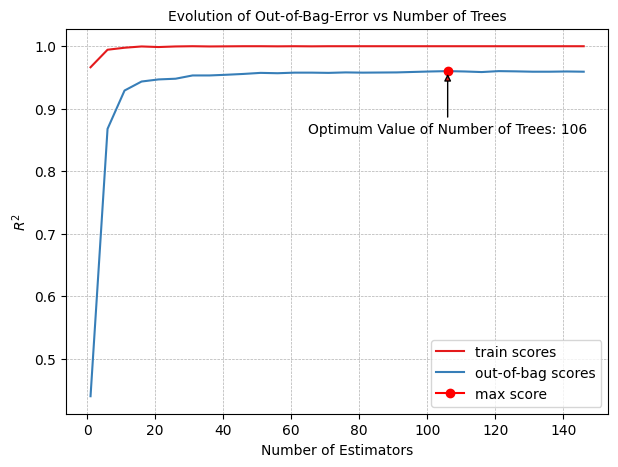

In [26]:
# Once  the number of estimators is know, the number of trees is found using Out-of-Bag error
train_scores = []
oob_scores   = []

# Valores evaluados
estimator_range = range(1, 150, 5)

# loop for training a model for each value in estimator_range 
# The training error and the Out-of-Bag are obtained.
for n_estimators in estimator_range:
    model = RandomForestClassifier(
                n_estimators = n_estimators,
                criterion    = 'entropy',
                max_depth    = None,
                max_features = 21,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 42
             )
    model.fit(X_train, y_train['one-hot__Attrition_Flag_Existing Customer'])
    train_scores.append(model.score(X_train, y_train['one-hot__Attrition_Flag_Existing Customer']))
    oob_scores.append(model.oob_score_)
    
# Graphic with the evolution of errors
sns.set_palette("Set1")

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, oob_scores, label="out-of-bag scores")
ax.plot(estimator_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red", label="max score")
ax.annotate(f"Optimum Value of Number of Trees: {estimator_range[np.argmax(oob_scores)]}",
            xy=(estimator_range[np.argmax(oob_scores)], max(oob_scores)),
            xytext=(estimator_range[np.argmax(oob_scores)], max(oob_scores)-0.1),
            arrowprops={'arrowstyle': '-|>'}, ha = 'center')
ax.set_ylabel(r'$R^2$')
ax.set_xlabel("Number of Estimators")
ax.set_title("Evolution of Out-of-Bag-Error vs Number of Trees", fontsize = 10)
plt.legend()
plt.grid(True, which = "both", ls = "--", linewidth = 0.5)

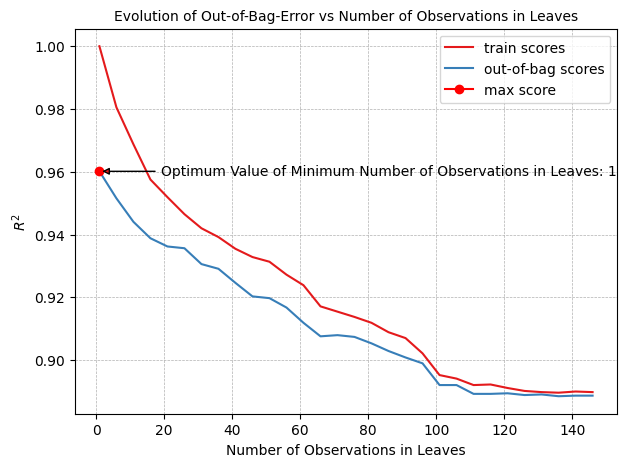

In [27]:
# Fitting the minimum number of observations in the leeaves of the trees using Out-of-Bag error
train_scores = []
oob_scores   = []

# Valores evaluados
obser_range = range(1, 150, 5)

# loop for training a model for each value in estimator_range 
# The training error and the Out-of-Bag are obtained.
for observ in obser_range:
    model = RandomForestClassifier(
                n_estimators = 106,
                criterion    = 'entropy',
                max_depth    = None,
                max_features = 21,
                min_samples_leaf = observ,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 42
             )
    model.fit(X_train, y_train['one-hot__Attrition_Flag_Existing Customer'])
    train_scores.append(model.score(X_train, y_train['one-hot__Attrition_Flag_Existing Customer']))
    oob_scores.append(model.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(obser_range, train_scores, label="train scores")
ax.plot(obser_range, oob_scores, label="out-of-bag scores")
ax.plot(obser_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red", label="max score")
ax.annotate(f"Optimum Value of Minimum Number of Observations in Leaves: {obser_range[np.argmax(oob_scores)]}",
            xy=(obser_range[np.argmax(oob_scores)], max(oob_scores)),
            xytext=(obser_range[np.argmax(oob_scores)]+18, max(oob_scores)),
            arrowprops={'arrowstyle': '-|>'}, va='center')
            
ax.set_ylabel(r'$R^2$')
ax.set_xlabel("Number of Observations in Leaves")
ax.set_title("Evolution of Out-of-Bag-Error vs Number of Observations in Leaves", fontsize = 10)
plt.legend()
plt.grid(True, which = "both", ls = "--", linewidth = 0.5)

In [28]:
# Model creation
rf_model = RandomForestClassifier(
            n_estimators = 106,  # number of trees
            criterion    = 'entropy',
            max_depth    = None,
            max_features = 21,
            min_samples_leaf = 1,
            oob_score    = True,
            n_jobs       = -1,
            random_state = 42
         )

# Training Random Forest
rf_model.fit(X_train, y_train['one-hot__Attrition_Flag_Existing Customer'])

RandomForestClassifier(criterion='entropy', max_features=21, n_estimators=106,
                       n_jobs=-1, oob_score=True, random_state=42)

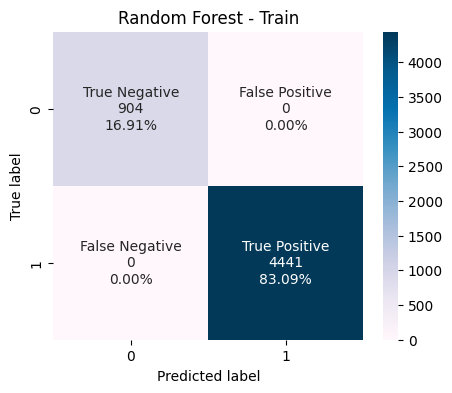

In [29]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_train['one-hot__Attrition_Flag_Existing Customer'], rf_model.predict(X_train), labels=rf_model.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('Random Forest - Train')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()


In [30]:
importance_predictors = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importance': rf_model.feature_importances_}
                            )
print("-------------------------------------------")
print("Importance  of the Model Predictors")
print("-------------------------------------------")
importance_predictors.sort_values('importance', ascending = False)

-------------------------------------------
Importance  of the Model Predictors
-------------------------------------------


,predictor,importance
49,minmax__Total_Trans_Amt,0.248040
50,minmax__Total_Trans_Ct,0.204071
51,minmax__Total_Revolving_Bal,0.081751
52,power__Total_Revolving_Bal,0.072552
47,standard__Total_Ct_Chng_Q4_Q1,0.071639
46,standard__Total_Amt_Chng_Q4_Q1,0.050061
53,power__Credit_Limit,0.035226
45,standard__Customer_Age,0.033591
54,power__Avg_Utilization_Ratio,0.029414
26,one-hot__Total_Relationship_Count_2,0.026976


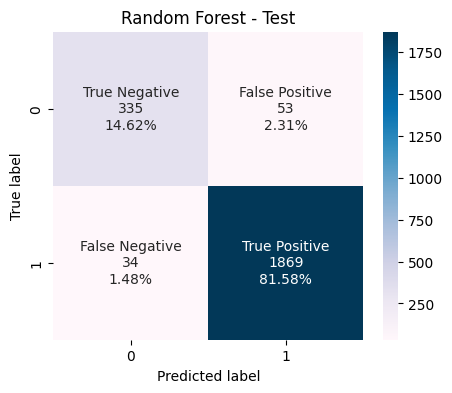

In [31]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test['one-hot__Attrition_Flag_Existing Customer'], rf_model.predict(X_test), labels=rf_model.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('Random Forest - Test')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

In [32]:
# Grid to find hiperparameters
from sklearn.model_selection import ParameterGrid

param_grid = ParameterGrid(
                {'n_estimators': [20, 25, 50, 100, 150],
                'max_features': [5, 10, 15, 20, 25],
                'max_depth'   : [1, 5, 10, 15, 20],
                'criterion'   : ['gini', 'entropy']
                }
            )

results = {'params': [], 'oob_accuracy': []}

for params in param_grid:
    
    model = RandomForestClassifier(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 42,
                ** params
             )
    
    model.fit(X_train, y_train['one-hot__Attrition_Flag_Existing Customer'])
    
    results['params'].append(params)
    results['oob_accuracy'].append(model.oob_score_)

# Results
results = pd.DataFrame(results)
results = pd.concat([results, results['params'].apply(pd.Series)], axis=1)
results = results.sort_values('oob_accuracy', ascending=False)
results = results.drop(columns = 'params')
results.head(10)

,oob_accuracy,criterion,max_depth,max_features,n_estimators
219,0.960150,entropy,15,20,150
218,0.959214,entropy,15,20,100
244,0.959214,entropy,20,20,150
243,0.959214,entropy,20,20,100
99,0.958466,gini,15,25,150
199,0.958092,entropy,10,25,150
94,0.957905,gini,15,20,150
224,0.957717,entropy,15,25,150
119,0.957717,gini,20,20,150
93,0.957530,gini,15,20,100


In [33]:
# Better hyperparameters using out-of-bag error
print("--------------------------------------------------")
print("Better Hyperparameters Found (OOB - Accuracy)")
print("--------------------------------------------------")
print(results.iloc[0,0], ":", results.iloc[0,:]['oob_accuracy'], "accuracy")

--------------------------------------------------
Better Hyperparameters Found (OOB - Accuracy)
--------------------------------------------------
0.9601496725912068 : 0.9601496725912068 accuracy


In [34]:
# Model creation
rf_best_oob = RandomForestClassifier(
            n_estimators = 150,  # number of trees
            criterion    = 'entropy',
            max_depth    = 15,
            max_features = 20,
            oob_score    = True,
            n_jobs       = -1,
            random_state = 42
         )

# Training Random Forest
rf_best_oob.fit(X_train, y_train['one-hot__Attrition_Flag_Existing Customer'])

RandomForestClassifier(criterion='entropy', max_depth=15, max_features=20,
                       n_estimators=150, n_jobs=-1, oob_score=True,
                       random_state=42)

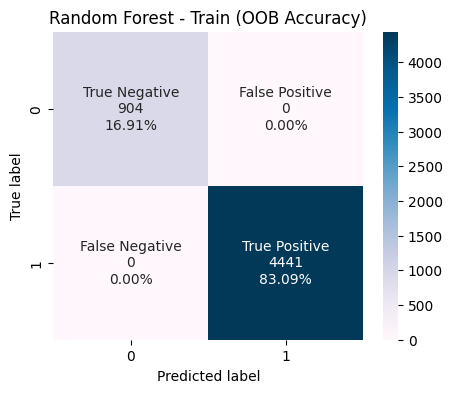

In [35]:
# Calculate the confusion matrix
cm = confusion_matrix(y_train['one-hot__Attrition_Flag_Existing Customer'], rf_best_oob.predict(X_train), labels=rf_best_oob.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('Random Forest - Train (OOB Accuracy)')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

In [36]:
importance_predictors = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importance': rf_best_oob.feature_importances_}
                            )
print("-------------------------------------------")
print("Importance  of the Model Predictors")
print("-------------------------------------------")
importance_predictors.sort_values('importance', ascending = False)

-------------------------------------------
Importance  of the Model Predictors
-------------------------------------------


,predictor,importance
49,minmax__Total_Trans_Amt,0.252887
50,minmax__Total_Trans_Ct,0.192550
51,minmax__Total_Revolving_Bal,0.082787
47,standard__Total_Ct_Chng_Q4_Q1,0.073143
52,power__Total_Revolving_Bal,0.071919
46,standard__Total_Amt_Chng_Q4_Q1,0.049031
53,power__Credit_Limit,0.034632
45,standard__Customer_Age,0.031800
54,power__Avg_Utilization_Ratio,0.031728
26,one-hot__Total_Relationship_Count_2,0.027718


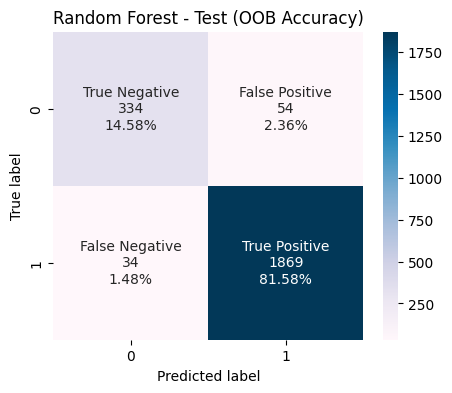

In [37]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test['one-hot__Attrition_Flag_Existing Customer'], rf_best_oob.predict(X_test), labels=rf_best_oob.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('Random Forest - Test (OOB Accuracy)')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

In [38]:
from sklearn.model_selection import RepeatedKFold

# Grid search based on cross-validation
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [20, 25, 50, 100, 150],
              'max_features': [5, 10, 15, 20, 25],
              'max_depth'   : [1, 5, 10, 15, 20],
            'criterion'   : ['gini', 'entropy']
             }

# Grid search by CV
grid = GridSearchCV(
        estimator  = RandomForestClassifier(random_state = 123),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train['one-hot__Attrition_Flag_Existing Customer'])

# Resultados
results_cv = pd.DataFrame(grid.cv_results_)
results_cv.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_criterion,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
249,entropy,20,25,150,0.957717,0.004534,1.000000,0.000000
224,entropy,15,25,150,0.957593,0.004766,1.000000,0.000000
223,entropy,15,25,100,0.957406,0.005378,0.999953,0.000094
248,entropy,20,25,100,0.957094,0.004452,0.999984,0.000058


In [ ]:
# Better hyperparameters using cv and out-of-bag error
print("----------------------------------------")
print("Better hyperparameters found (Cross-Validation)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Better hyperparameters found (Cross-Validation)
----------------------------------------
{'criterion': 'entropy', 'max_depth': None, 'max_features': 9, 'n_estimators': 100} : 0.9482382288743374 accuracy


In [39]:
# Model creation
rf_cv = RandomForestClassifier(
            n_estimators = 150,  # number of trees
            criterion    = 'entropy',
            max_depth    = 20,
            max_features = 25,
            oob_score    = True,
            n_jobs       = -1,
            random_state = 42
         )

# Training Random Forest
rf_cv.fit(X_train, y_train['one-hot__Attrition_Flag_Existing Customer'])

RandomForestClassifier(criterion='entropy', max_depth=20, max_features=25,
                       n_estimators=150, n_jobs=-1, oob_score=True,
                       random_state=42)

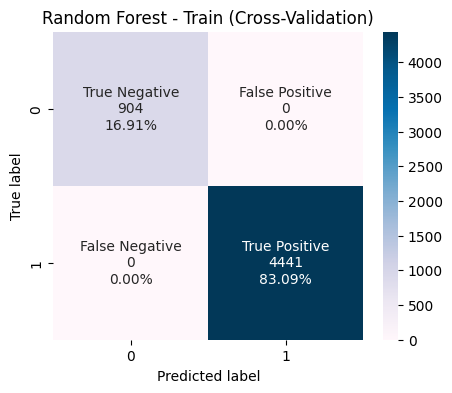

In [40]:
# Calculate the confusion matrix
cm = confusion_matrix(y_train['one-hot__Attrition_Flag_Existing Customer'], rf_cv.predict(X_train), labels=rf_cv.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('Random Forest - Train (Cross-Validation)')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

In [41]:
importance_predictors = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importance': rf_cv.feature_importances_}
                            )
print("-------------------------------------------")
print("Importance  of the Model Predictors")
print("-------------------------------------------")
importance_predictors.sort_values('importance', ascending = False)

-------------------------------------------
Importance  of the Model Predictors
-------------------------------------------


,predictor,importance
49,minmax__Total_Trans_Amt,0.256805
50,minmax__Total_Trans_Ct,0.214605
51,minmax__Total_Revolving_Bal,0.078093
52,power__Total_Revolving_Bal,0.070363
47,standard__Total_Ct_Chng_Q4_Q1,0.069983
46,standard__Total_Amt_Chng_Q4_Q1,0.051931
45,standard__Customer_Age,0.033469
54,power__Avg_Utilization_Ratio,0.031581
53,power__Credit_Limit,0.029879
26,one-hot__Total_Relationship_Count_2,0.027967


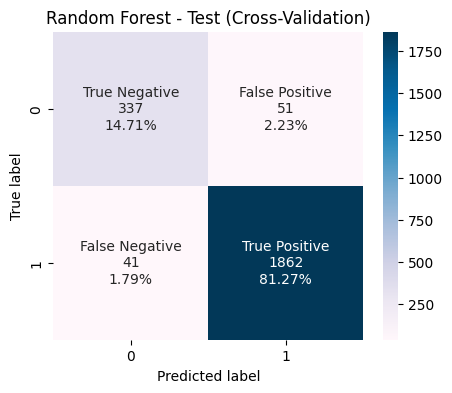

In [42]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test['one-hot__Attrition_Flag_Existing Customer'], rf_cv.predict(X_test), labels=rf_cv.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('Random Forest - Test (Cross-Validation)')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

El mejor modelo alcanzado es `rf_model`, al presentar la mayor precisión en la matriz de confusión de test. No obstante, todos los Random Forest tienen precisiones muy similares. El modelo usado para buscar hiperparámetros con Grid Validation es quizás el mas descaconsejable por su elevado tiempo de búsqueda con respecto a los otros dos.

## <span style="font-family: Latin Modern Roman; font-size: 23px;"> 5.2. Classification Report </span>

In [57]:
from sklearn.metrics import classification_report
print(
    classification_report(
        y_true = y_test['one-hot__Attrition_Flag_Existing Customer'],
        y_pred = rf_model.predict(X_test)
    )
)


              precision    recall  f1-score   support

         0.0       0.91      0.86      0.89       388
         1.0       0.97      0.98      0.98      1903

    accuracy                           0.96      2291
   macro avg       0.94      0.92      0.93      2291
weighted avg       0.96      0.96      0.96      2291



In [63]:
# Churn Classification using Random Forest with various thresholds
# ==============================================================================
df_predictions = pd.DataFrame(data = rf_model.predict_proba(X = X_test), columns=['0', '1'])
df_predictions['classification_default_0.5'] = np.where(df_predictions['0'] > df_predictions['1'], 0, 1)
df_predictions['classification_custom_0.8'] = np.where(df_predictions['1'] > 0.8, 1, 0)
df_predictions['classification_custom_0.9'] = np.where(df_predictions['1'] > 0.9, 1, 0)
df_predictions.head(20)

,0,1,classification_default_0.5,classification_custom_0.8,classification_custom_0.9
0,0.150943,0.849057,1,1,0
1,0.584906,0.415094,0,0,0
2,0.000000,1.000000,1,1,1
3,0.009434,0.990566,1,1,1
4,0.122642,0.877358,1,1,0
5,0.103774,0.896226,1,1,0
6,0.028302,0.971698,1,1,1
7,0.009434,0.990566,1,1,1
8,0.000000,1.000000,1,1,1
9,0.000000,1.000000,1,1,1


---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 6. Clustering </span>

## <span style="font-family: Latin Modern Roman; font-size: 23px;"> 6.1. Number of Clusters</span>

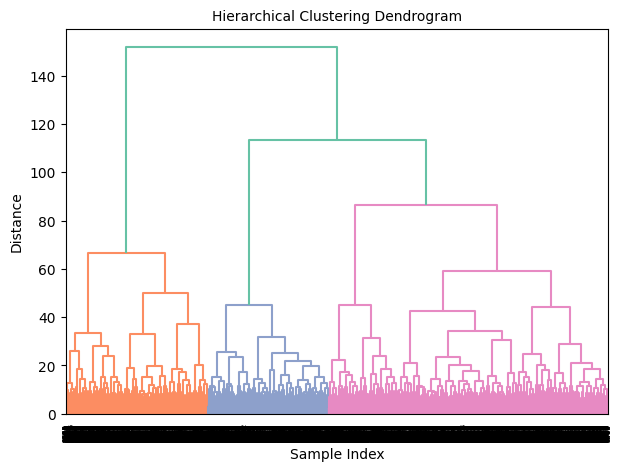

In [39]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_data = linkage(df_scaled, method = 'ward', metric = 'euclidean')
sns.set_palette('Set2')

plt.figure(figsize=(7, 5))
dendrogram(linkage_data)
plt.title('Hierarchical Clustering Dendrogram', fontsize = 10)
plt.xlabel('Sample Index')
plt.ylabel('Distance')

plt.show()

In [40]:
from sklearn.cluster import KMeans
Ks = range(2, 20)
# inertia = distorsion
kmeans_per_k = [KMeans(n_clusters = k, n_init = 10, random_state = 42).fit(df_scaled) for k in Ks]
inertias = [model.inertia_ for model in kmeans_per_k]

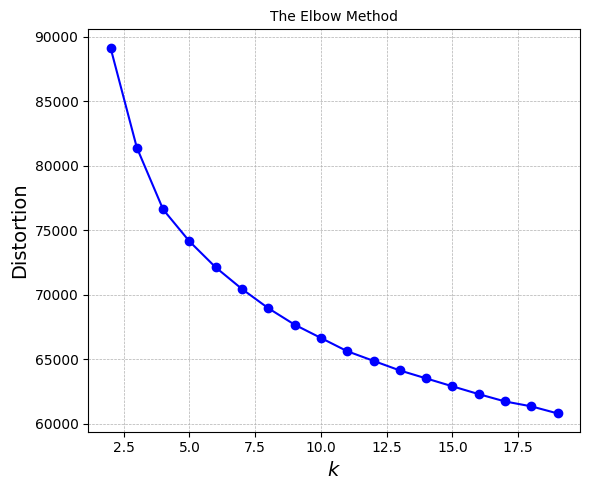

In [41]:
plt.figure(figsize = (6, 5))
plt.title('The Elbow Method', fontsize = 10)
plt.plot(Ks, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Distortion", fontsize=14)
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.tight_layout()
plt.show()

<div style="text-align: justify;">

El **Método del codo** utiliza el cambio de pendiente para indicar un número potencialmente interesante de grupos. En este caso parece haber un cambio de pendiente entre 3 y 4 clusters.
</div>

In [42]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(df_scaled, model.labels_) for model in kmeans_per_k]

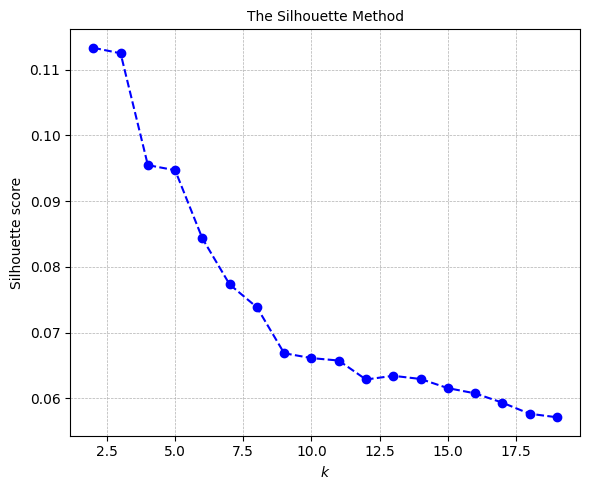

In [43]:
plt.figure(figsize = (6, 5))
plt.plot(Ks, silhouette_scores, "bo--")
plt.title('The Silhouette Method', fontsize = 10)
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.tight_layout()
plt.show()

<div style="text-align: justify;">

El **Método de la Silueta** mide qué tan similar es un punto a su propio grupo en comparación con otros grupos y calcula un coeficiente. Cuanto mayor sea el coeficiente final, más óptimo será el número de conglomerados. Los coeficientes más altos para el caso se alcanzan en 3 clusters nuevamente.
</div>

## <span style="font-family: Latin Modern Roman; font-size: 23px;"> 6.2. Principal Component Analysis (PCA)</span>

<div style="text-align: justify;">

El número de clusters idóneo es equivalente a 3. Sin embargo, la clase a predecir tiene 2 valores, si el cliente sigue manteniendo la tarjeta de crédito o no, siendo una salida binaria. Se hace un análisis para ver las características y la distribución de los clientes en los clusters fijados.

Por otra parte, dada el gran número de columnas y la alta dimensionalidad del dataset, se aplica PCA para reducir el número de dimensiones a 2, con el objetivo de visualizar la distribución de los clusters en gráficos 2D.

</div>

In [44]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2D for visualization
pca = PCA(n_components = 2)
df_scaled_2d = pca.fit_transform(df_scaled)


## <span style="font-family: Latin Modern Roman; font-size: 23px;"> 6.3. Clustering Distribution</span>

<div style="text-align: justify;">

La agrupación aglomerativa, a diferencia de KMeans, puede manejar grupos no esféricos y de diferentes tamaños. Proporciona una jerarquía de grupos, que puede ser útil para análisis posteriores
</div>

In [45]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')
clustering_model.fit(df_scaled_2d)
clusters = clustering_model.labels_
clusters

array([1, 2, 1, ..., 1, 1, 1])

In [46]:
import collections

print(collections.Counter(clusters))

Counter({1: 3227, 0: 2258, 2: 2151})


In [47]:
df_clusters = df.copy()
df_clusters["Cluster"] = clusters

df_clusters.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Cluster
10,Existing Customer,42,M,5,Uneducated,Unknown,$120K +,Blue,31,5,3,2,6748.0,1467,0.831,1201,42,0.680,0.217,1
14,Existing Customer,57,F,2,Graduate,Married,Less than $40K,Blue,48,5,2,2,2436.0,680,1.190,1570,29,0.611,0.279,2
20,Existing Customer,47,M,1,Doctorate,Single,$60K - $80K,Blue,42,5,2,0,20979.0,1800,0.906,1178,27,0.929,0.086,1
21,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,2,3,3,1438.3,0,1.047,692,16,0.600,0.000,2
23,Existing Customer,47,F,4,Unknown,Single,Less than $40K,Blue,36,3,3,2,2492.0,1560,0.573,1126,23,0.353,0.626,0


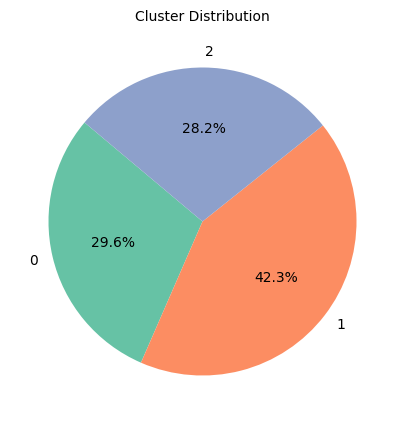

In [48]:
# Count of each cluster
cluster_counts = df_clusters["Cluster"].value_counts().sort_index()

# Pie Plot
plt.figure(figsize=(5, 5))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140, colors = sns.color_palette("Set2"))

plt.title('Cluster Distribution', fontsize = 10)
plt.show()

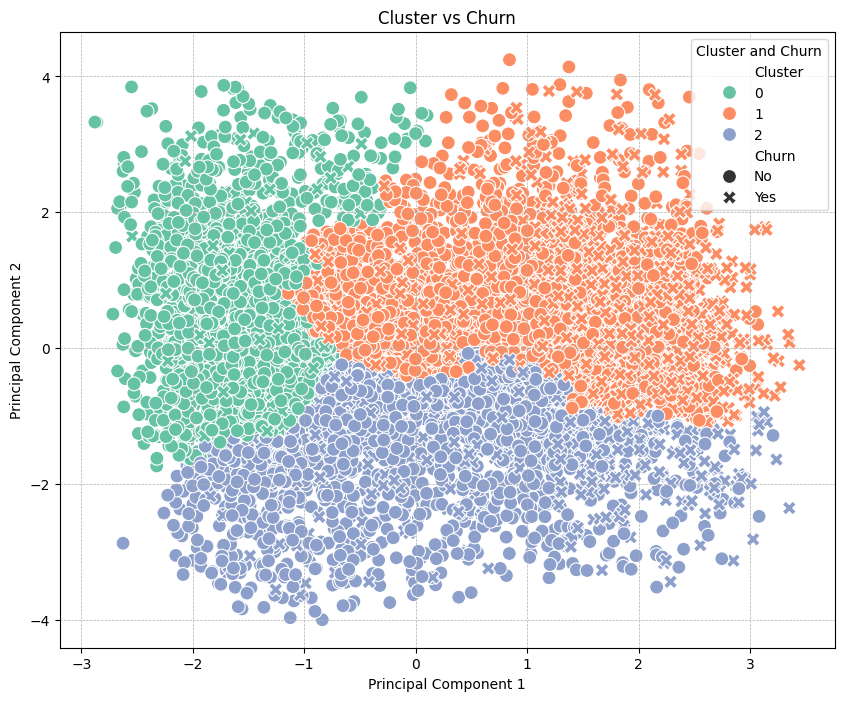

In [52]:
df_plot = pd.DataFrame(df_scaled_2d, columns=['PCA1', 'PCA2'])
df_plot['Cluster'] = clusters
df_plot['Churn'] = y['one-hot__Attrition_Flag_Attrited Customer'].apply(lambda x: 'Yes' if x == 1 else 'No')

# Plot
plt.figure(figsize = (10, 8))
sns.scatterplot(data = df_plot, x = 'PCA1', y = 'PCA2', hue = 'Cluster', style = 'Churn', palette = 'Set2', s = 100)

plt.title('Cluster vs Churn', fontsize = 12)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster and Churn', loc='best')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()


## <span style="font-family: Latin Modern Roman; font-size: 23px;"> 6.4. Clustering Analysis</span>

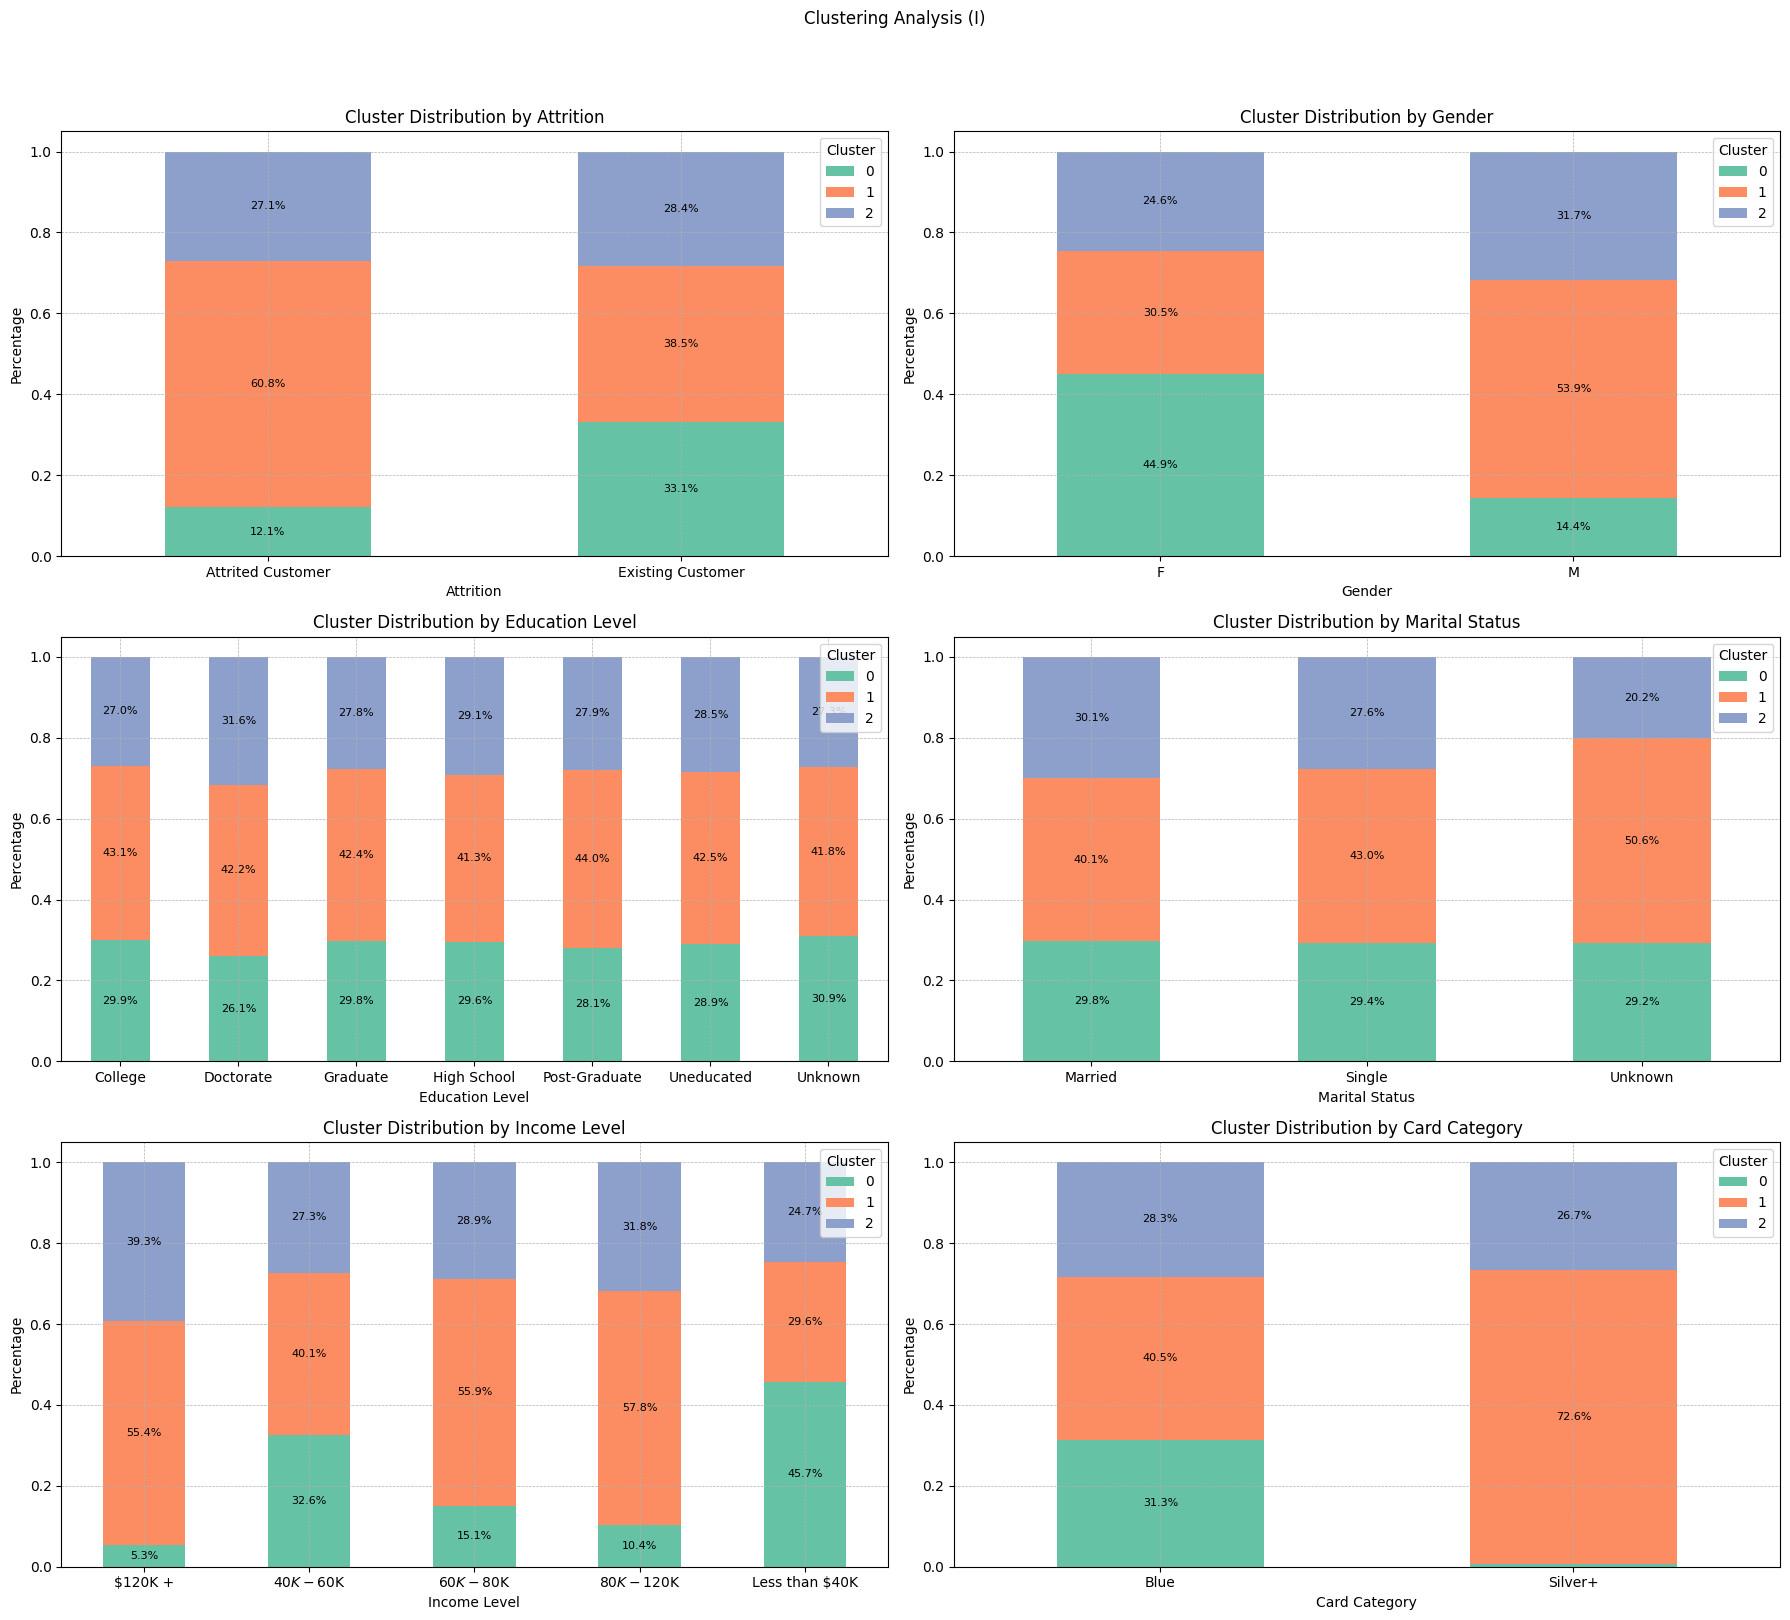

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

def prepare_stacked_bar_data(df, category_col, cluster_col):
    # Calculate the count of each group
    group_size = df.groupby([category_col, cluster_col]).size().unstack(fill_value=0)
    # Calculate the percentage of each category within each cluster
    percentage_data = group_size.divide(group_size.sum(axis=1), axis=0)
    return percentage_data

def plot_stacked_bar(data, ax, title, xlabel):
    # Plotting the data
    data.plot(kind = 'bar', stacked = True, ax = ax, color = sns.color_palette("Set2"))
 
    # Adding annotations
    for bar in ax.patches:
        bar_x = bar.get_x() + bar.get_width() / 2
        bar_y = bar.get_y() + bar.get_height() / 2
        percentage = f'{bar.get_height() * 100:.1f}%'
        if bar.get_height() > 0.01:  # This filters out the negligible percentages
            ax.text(bar_x, bar_y, percentage, ha = 'center', va = 'center', fontsize = 8, color = 'black')

    # Setting chart title and labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Percentage')
    ax.grid(True, which="both", ls="--", linewidth=0.5)
    ax.tick_params(axis = 'x', labelrotation=0)

fig, axes = plt.subplots(3, 2, figsize=(18, 17))
fig.suptitle('Clustering Analysis (I)')

# Creating subplots for each category
for i, (col, name) in enumerate(nominal_categories.items()):
    ax = axes[i//2, i%2]
    percentage_data = prepare_stacked_bar_data(df_clusters, col, 'Cluster')
    plot_stacked_bar(percentage_data, ax, f'Cluster Distribution by {name}', name)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


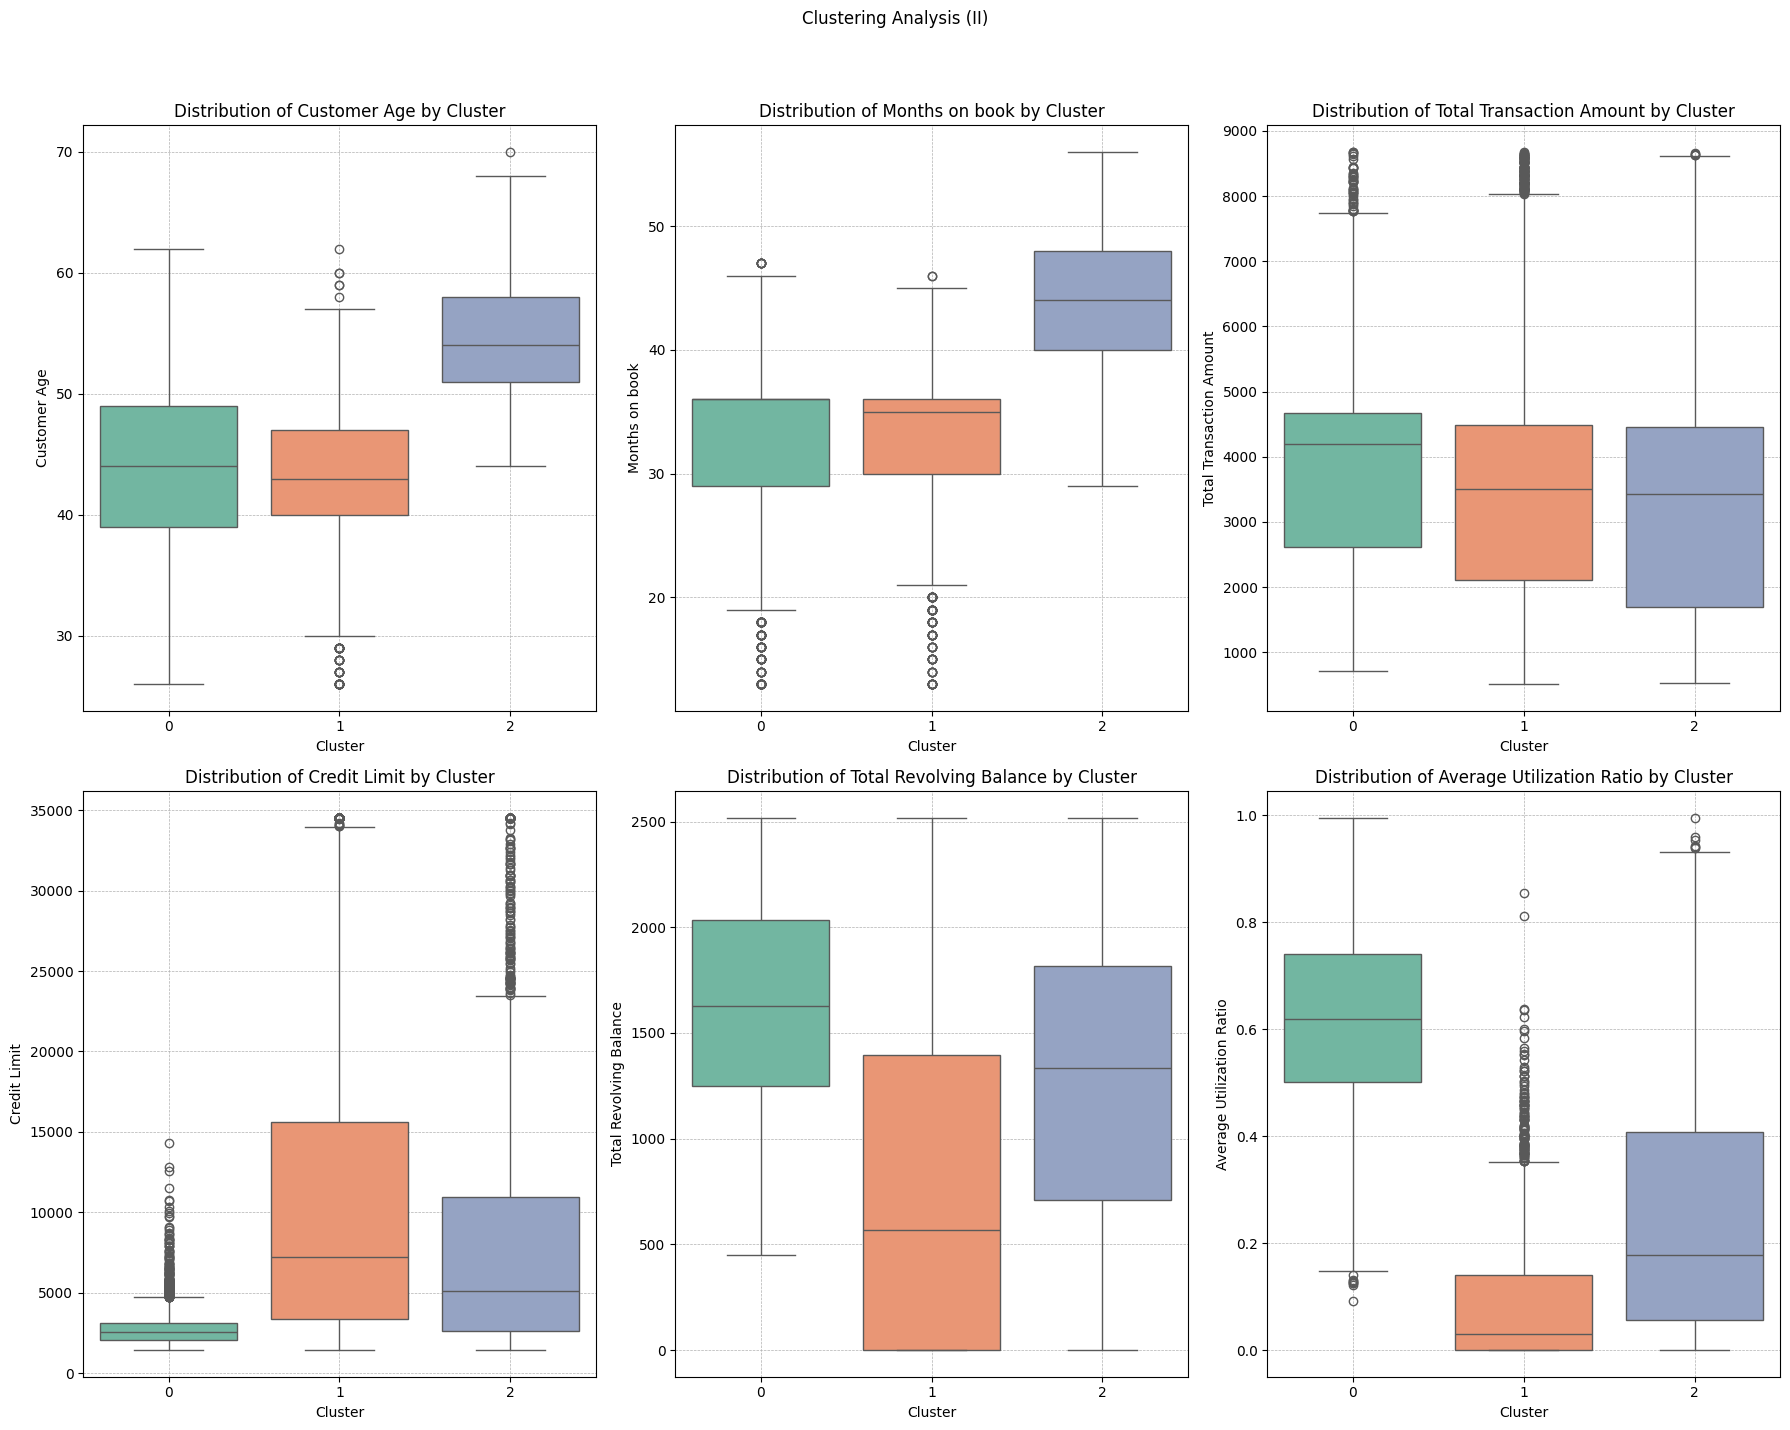

In [51]:
numerical_categories = {
    'Customer_Age': 'Customer Age',
    'Months_on_book': 'Months on book',
    'Total_Trans_Amt': 'Total Transaction Amount',
    'Credit_Limit': 'Credit Limit',
    'Total_Revolving_Bal': 'Total Revolving Balance',
    'Avg_Utilization_Ratio': 'Average Utilization Ratio'
}

# Creating the figure and axes for a 2x3 subplot grid
fig, axes = plt.subplots(2, 3, figsize=(18, 15))
fig.suptitle('Clustering Analysis (II)')

# Loop over the dictionary items and create a boxplot for each category
for i, (column_key, column_name) in enumerate(numerical_categories.items()):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.boxplot(x = 'Cluster', y = column_key, data = df_clusters, ax = ax, palette = "Set2")
    ax.set_title(f'Distribution of {column_name} by Cluster')
    ax.set_xlabel('Cluster')
    ax.set_ylabel(column_name)
    ax.grid(True, which="both", ls="--", linewidth=0.5)

# Adjust layout to prevent overlap and to allocate space for titles and legends
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 7. Neural Networks - MLP </span>